<a href="https://colab.research.google.com/github/Raxmatillo/credit-card-clustering/blob/main/Kredit_kartasini_klasterlash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [3]:
# ma’lumotlarni yuklash
X = pd.read_csv('https://raw.githubusercontent.com/Raxmatillo/credit-card-clustering/main/CC%20GENERAL.csv')

# Maʼlumotlardan CUST_ID ustunini olib tashlash
X = X.drop('CUST_ID', axis = 1)

# Agar ular mavjud bo'lsa, etishmayotgan qiymatlarni qayta ishlash
X.fillna(method ='ffill', inplace = True)

X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# Vizual qilish uchun ma'lumotlarni oldindan qayta ishlash
# Ma'lumotlarni masshtablash
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ma’lumotlarni normalizatsiya qilish
X_normalized = normalize(X_scaled)

# Numpy massivini pandas DataFrame-ga aylantirish
X_normalized = pd.DataFrame(X_normalized)

# Ma'lumotlarning o'lchamlarini kamaytirish
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

X_principal.head()

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544828
2,0.330633,0.268878
3,-0.481657,-0.097608
4,-0.563512,-0.482506


In [5]:
# klaster modelini qurish
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf')

# Modelni o'rgatish va bashorat qilingan klaster belgilarini saqlash
labels_rbf = spectral_model_rbf.fit_predict(X_principal)

a) affinity ='rbf'

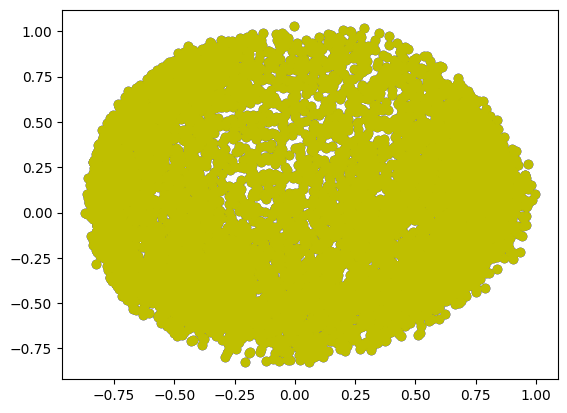

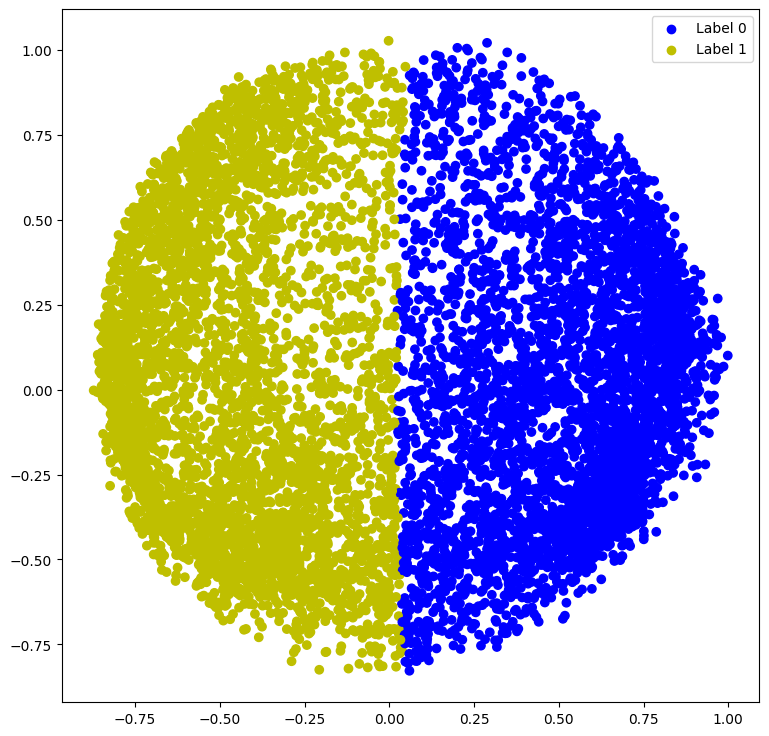

In [6]:
# Ranglarni xaritalash uchun yorliq yaratish
colours = {}
colours[0] = 'b'
colours[1] = 'y'

# Har bir ma'lumot nuqtasi uchun rang vektorini yaratish
cvec = [colours[label] for label in labels_rbf]

# Klasterli tarqalish grafigini tuzish

b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y');

plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend((b, y), ('Label 0', 'Label 1'))
plt.show()


b) affinity ='nearest_neighbors'

In [8]:
# Klasterlash modelini yaratish
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors')

# Modelni o'rgatish va taxmin qilingan klaster belgilarini saqlash
labels_nn = spectral_model_nn.fit_predict(X_principal)

In [10]:
# Turli xil yaqinlik qiymatlari ro'yxati
affinity = ['rbf', 'nearest-neighbours']

# Siluet ballari ro'yxati
s_scores = []

# Samaradorlikni baholash
s_scores.append(silhouette_score(X, labels_rbf))
s_scores.append(silhouette_score(X, labels_nn))


[0.05300611480757429, 0.05667039590382262]
